# Dataset preprocess

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xzvf /content/drive/MyDrive/301Project/off_image_test.tar.gz
!tar -xzvf /content/drive/MyDrive/301Project/off_image_train.tar.gz

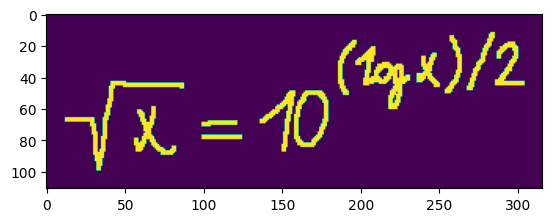

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
image1 = Image.open("off_image_train/MfrDB1326_0.bmp")
plt.imshow(image1)

In [ ]:
import os
from torch.utils.data import Dataset

class ImageDataset(Dataset):
    def __init__(self, image_dir, caption_file, transform=None):
        """
        Args:
            image_dir (string): Directory with all the images.
            caption_file (string): Path to the text file with image captions.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.image_dir = image_dir
        self.image_labels = self._load_labels(caption_file)
        self.transform = transform

    def _load_labels(self, caption_file):
        # Load the labels from the file
        image_labels = {}
        with open(caption_file, 'r') as file:
            for line in file:
                parts = line.strip().split('\t')
                if len(parts) != 2:
                    print(f'illegal line: {line}')
                    continue
                image_labels[parts[0]] = parts[1]
        return image_labels

    def __len__(self):
        return len(self.image_labels)

    def __getitem__(self, idx):
        # Get the image name and its corresponding label
        image_name = list(self.image_labels.keys())[idx]
        label = self.image_labels[image_name]

        # Load image
        image_path = os.path.join(self.image_dir, image_name + '_0.bmp')
        image = Image.open(image_path).convert('L')

        # Apply transformation
        if self.transform:
            image = self.transform(image)

        # Convert label to tensor or numerical format if required
        # For example, using a label encoder or dictionary mapping

        sample = {'image': image, 'label': label}

        return sample

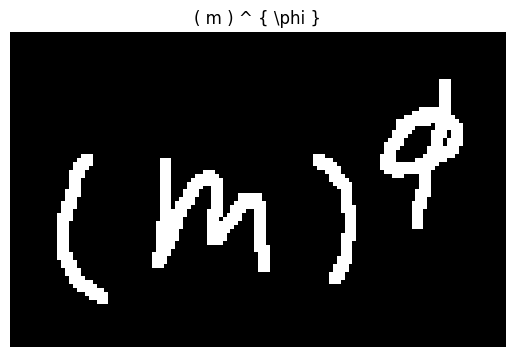

'( m ) ^ { \\phi }'

In [ ]:
import random

# Define the directory where the images are located
image_dir = 'off_image_train'

# Path to the caption file
caption_file_path = '/content/drive/MyDrive/301Project/train_caption.txt'

# Function to load image names and labels from the caption file
def load_image_labels(caption_file_path):
    image_labels = {}
    with open(caption_file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) == 2:
                image_labels[parts[0]] = parts[1]
    return image_labels

# Function to display a random image and its label
def display_random_image(image_dir, image_labels):
    random_key = random.choice(list(image_labels.keys()))
    image_path = os.path.join(image_dir, random_key + '_0.bmp')
    image = Image.open(image_path)
    label = image_labels[random_key]

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.axis('off')  # Hide the axis
    plt.show()
    return image, label

# Load image names and labels
image_labels = load_image_labels(caption_file_path)

# Display a random image and its label
random_image, random_label = display_random_image(image_dir, image_labels)
random_label  # Returning the label as well to output it in the next cell

In [ ]:
test_file_path = '/content/drive/MyDrive/301Project/test_caption.txt'
test_labels = load_image_labels(test_file_path)

In [ ]:
import os
import sys
import pickle as pkl
import numpy as np
import imageio

#image_path = '/content/off_image_train/'
image_path = '/content/off_image_test/'
#outFile = 'offline-train.pkl'
outFile = 'offline-test.pkl'

features = {}
channels = 1
sentNum = 0

#caption_file_path = '/content/drive/MyDrive/301Project/train_caption.txt'
caption_file_path = '/content/drive/MyDrive/301Project/test_caption.txt'

# Use 'with' statements to handle files
with open(caption_file_path) as scpFile, open(outFile, 'wb') as oupFp_feature:
    while True:
        line = scpFile.readline().strip()  # remove the '\r\n'
        if not line:
            break
        else:
            key = line.split('\t')[0]
            image_file = image_path + key + '_' + str(0) + '.bmp'
            im = imageio.imread(image_file)
            mat = np.zeros([channels, im.shape[0], im.shape[1]], dtype='uint8')
            for channel in range(channels):
                image_file = image_path + key + '_' + str(channel) + '.bmp'
                im = imageio.imread(image_file)
                mat[channel, :, :] = im
            sentNum += 1
            features[key] = mat
            if sentNum % 500 == 0:
                print('process sentences ', sentNum)

    print('load images done. sentence number ', sentNum)

    # Pickle the 'features' dictionary using the highest protocol available
    pkl.dump(features, oupFp_feature, protocol=pkl.HIGHEST_PROTOCOL)
    print('save file done')


<ipython-input-7-60eaf5a74811>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(image_file)
<ipython-input-7-60eaf5a74811>:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(image_file)


process sentences  500
load images done. sentence number  986
save file done


In [ ]:

def gen_voc(infile, vocfile):
    vocab = set()
    with open(infile, encoding='utf-8') as f:  # Specify encoding if needed
        for line in f:
            parts = line.strip().split('\t')
            if len(parts) != 2:
                print('illegal line:', line)
                continue
            (title, label) = parts
            for w in label.split():
                vocab.add(w)  # No need to check if in vocab due to the nature of a set

    with open(vocfile, 'w', encoding='utf-8') as fout:  # Specify encoding if needed
        for i, w in enumerate(sorted(vocab)):  # Sort vocab for consistent ordering
            fout.write('{}\t{}\n'.format(w, i+1))
        fout.write('<eol>\t0\n')  # Assuming you want to include <eol> in your vocab
    print('vocab file generated')

train_cap = '/content/drive/MyDrive/301Project/train_caption.txt'
test_cap = '/content/drive/MyDrive/301Project/test_caption.txt'
vocfile = 'vocabulary.txt'
gen_voc(train_cap, vocfile)

vocab file generated


# Encoder (Resnet50)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np
import os

def preprocess_image(img_path):
    """Preprocess the image to be ResNet-50 compatible"""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)[:100]
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

def extract_features(directory):
    """Extract features from all images in the given directory"""
    model = ResNet50(weights='imagenet', include_top=False)
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)  # Get the last convolutional layer
    features = {}
    for img_name in os.listdir(directory)[:3000]:
        # Ensure processing only .bmp files
        if img_name.lower().endswith('.bmp'):
            img_path = os.path.join(directory, img_name)
            img_preprocessed = preprocess_image(img_path)
            features_vector = model.predict(img_preprocessed)
            features_vector = features_vector.flatten()  # Flatten the features to a vector
            img_id = img_name.split('.')[0][:-2]  # Assuming img_name format is 'id.bmp'
            features[img_id] = features_vector
    return features

train_features = extract_features('/content/off_image_train')

In [ ]:
def extract_features_test(directory):
    """Extract features from all images in the given directory"""
    model = ResNet50(weights='imagenet', include_top=False)
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)  # Get the last convolutional layer
    features = {}
    for img_name in os.listdir(directory)[:800]:
        # Ensure processing only .bmp files
        if img_name.lower().endswith('.bmp'):
            img_path = os.path.join(directory, img_name)
            img_preprocessed = preprocess_image(img_path)
            features_vector = model.predict(img_preprocessed)
            features_vector = features_vector.flatten()  # Flatten the features to a vector
            img_id = img_name.split('.')[0][:-2]  # Assuming img_name format is 'id.bmp'
            features[img_id] = features_vector
    return features

# Example usage:
test_features = extract_features_test('/content/off_image_test')

In [ ]:
train_features

# Encoder (Resnet50+positional encoding)

In [ ]:
import tensorflow as tf
import math
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model

# Assuming TensorFlow 2.x; for TensorFlow 1.x, adjustments may be needed
#https://github.com/guillaumegenthial/im2latex/blob/master/model/components/positional.py
def add_timing_signal_nd(x, min_timescale=1.0, max_timescale=1.0e4):
    static_shape = x.shape.as_list()
    num_dims = len(static_shape) - 2
    channels = x.shape[-1]
    num_timescales = channels // (num_dims * 2)
    log_timescale_increment = (
        math.log(float(max_timescale) / float(min_timescale)) /
        (float(num_timescales) - 1))
    inv_timescales = min_timescale * tf.exp(
        tf.range(num_timescales, dtype=tf.float32) * -log_timescale_increment)
    for dim in range(num_dims):
        length = x.shape[dim + 1]
        position = tf.range(length, dtype=tf.float32)
        scaled_time = tf.expand_dims(position, 1) * tf.expand_dims(
            inv_timescales, 0)
        signal = tf.concat([tf.sin(scaled_time), tf.cos(scaled_time)], axis=1)
        prepad = dim * 2 * num_timescales
        postpad = channels - (dim + 1) * 2 * num_timescales
        signal = tf.pad(signal, [[0, 0], [prepad, postpad]])
        for _ in range(1 + dim):
            signal = tf.expand_dims(signal, 0)
        for _ in range(num_dims - 1 - dim):
            signal = tf.expand_dims(signal, -2)
        x = x + signal
    return x

# Load ResNet50 model
model = ResNet50(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)

# Example usage in a function
def extract_features_with_positional_encoding(directory, set):
    features = {}
    if set == 'train':
      for img_name in os.listdir(directory)[0:3000]:
          if img_name.lower().endswith('.bmp'):
              img_path = os.path.join(directory, img_name)
              img_preprocessed = preprocess_image(img_path)
              cnn_output = model(img_preprocessed)
              cnn_output_with_pos = add_timing_signal_nd(cnn_output)
              # Additional processing such as flattening if needed
              features_vector = cnn_output_with_pos.numpy().flatten()
              img_id = img_name.split('.')[0]
              features[img_id] = features_vector
    elif set == 'test':
      for img_name in os.listdir(directory)[0:500]:
          if img_name.lower().endswith('.bmp'):
              img_path = os.path.join(directory, img_name)
              img_preprocessed = preprocess_image(img_path)
              cnn_output = model(img_preprocessed)
              cnn_output_with_pos = add_timing_signal_nd(cnn_output)
              # Additional processing such as flattening if needed
              features_vector = cnn_output_with_pos.numpy().flatten()
              img_id = img_name.split('.')[0]
              features[img_id] = features_vector
    return features

# Example usage:
train_features = extract_features_with_positional_encoding('/content/off_image_train', 'train')
test_features = extract_features_with_positional_encoding('/content/off_image_test', 'test')

In [ ]:
len(train_features)

3000

# Encoder (DenseNet169+positional)

In [ ]:
import tensorflow as tf
import math
from tensorflow.keras.applications.densenet import DenseNet169, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

def preprocess_image(img_path):
    """Preprocess the image to be DenseNet-169 compatible"""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

def add_timing_signal_nd(x, min_timescale=1.0, max_timescale=1.0e4):
    static_shape = x.shape.as_list()
    num_dims = len(static_shape) - 2
    channels = x.shape[-1]
    num_timescales = channels // (num_dims * 2)
    log_timescale_increment = (
        math.log(float(max_timescale) / float(min_timescale)) /
        (float(num_timescales) - 1))
    inv_timescales = min_timescale * tf.exp(
        tf.range(num_timescales, dtype=tf.float32) * -log_timescale_increment)
    for dim in range(num_dims):
        length = x.shape[dim + 1]
        position = tf.range(length, dtype=tf.float32)
        scaled_time = tf.expand_dims(position, 1) * tf.expand_dims(
            inv_timescales, 0)
        signal = tf.concat([tf.sin(scaled_time), tf.cos(scaled_time)], axis=1)
        prepad = dim * 2 * num_timescales
        postpad = channels - (dim + 1) * 2 * num_timescales
        signal = tf.pad(signal, [[0, 0], [prepad, postpad]])
        for _ in range(1 + dim):
            signal = tf.expand_dims(signal, 0)
        for _ in range(num_dims - 1 - dim):
            signal = tf.expand_dims(signal, -2)
        x = x + signal
    return x

# Load DenseNet169 model
model = DenseNet169(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)

def extract_features_with_positional_encoding(directory, set):
    features = {}
    if set == 'train':
      for img_name in os.listdir(directory)[0:3000]:
          if img_name.lower().endswith('.bmp'):
              img_path = os.path.join(directory, img_name)
              img_preprocessed = preprocess_image(img_path)
              cnn_output = model(img_preprocessed)
              cnn_output_with_pos = add_timing_signal_nd(cnn_output)
              features_vector = cnn_output_with_pos.numpy().flatten()
              img_id = img_name.split('.')[0]
              features[img_id] = features_vector
    elif set == 'test':
      for img_name in os.listdir(directory)[0:500]:
          if img_name.lower().endswith('.bmp'):
              img_path = os.path.join(directory, img_name)
              img_preprocessed = preprocess_image(img_path)
              cnn_output = model(img_preprocessed)
              cnn_output_with_pos = add_timing_signal_nd(cnn_output)
              features_vector = cnn_output_with_pos.numpy().flatten()
              img_id = img_name.split('.')[0]
              features[img_id] = features_vector
    return features


train_features = extract_features_with_positional_encoding('/content/off_image_train', 'train')
test_features = extract_features_with_positional_encoding('/content/off_image_test', 'test')


51877672/51877672 [==============================] - 3s 0us/step


In [ ]:
len(train_features['200922-949-31'])

81536

# Captions Tokenization

In [ ]:
# Function to load image names and labels from the caption file
def load_captions(caption_file_path):
    image_labels = {}
    with open(caption_file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) == 2:
                image_labels[parts[0]] = parts[1]
    return image_labels

train_captions = load_captions(train_cap)
test_captions = load_captions(test_cap)

In [ ]:
train_features = {key[:-2]: value for key, value in train_features.items() if key.endswith('_0')}
test_features = {key[:-2]: value for key, value in test_features.items() if key.endswith('_0')}

In [ ]:
# Assuming large_dict is your larger dictionary and small_dict is your smaller dictionary.
train_captions = {key: train_captions[key] for key in train_features.keys() if key in train_captions}
test_captions = {key: test_captions[key] for key in test_features.keys() if key in test_captions}

In [ ]:
def preprocess_captions(captions_dict):
    """Preprocess captions by adding start and end tokens."""
    for image_id, caption in captions_dict.items():
        # Add start and end tokens
        captions_dict[image_id] = f'<start> {caption} <end>'
    return list(captions_dict.values())

train_captions_list = preprocess_captions(train_captions)

In [ ]:
train_captions_list

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the captions
tokenizer = Tokenizer(filters='', split=' ', lower=False)
tokenizer.fit_on_texts(train_captions_list)
vocab_size = len(tokenizer.word_index) + 1  # Includes padding token

# Convert captions to sequences
train_seqs = tokenizer.texts_to_sequences(train_captions_list)

# Determine the maximum sequence length
max_length = max(len(seq) for seq in train_seqs)

# Pad
train_seqs = pad_sequences(train_seqs, maxlen=max_length, padding='post')

In [ ]:
train_seqs[0]

array([ 3, 12,  5,  8,  9, 13,  7,  1, 47,  2, 75,  5,  8, 47,  9,  4,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

# Decoder (LSTM)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Add, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Concatenate
import numpy as np

# Define parameters
vocab_size = len(tokenizer.word_index) + 1  # Assuming tokenizer is defined
max_length = max(len(seq) for seq in train_seqs)  # Assuming train_seqs is defined
embedding_dim = 256
units = 512

# Encoder
# `input_feature_shape` is the shape of your current feature vector
inputs1 = Input(shape=(81536,))
# Project feature vector back to desired shape, e.g., 2048
fe1 = Dense(2048, activation='relu')(inputs1)
fe2 = Dense(embedding_dim, activation='relu')(fe1)  # Output shape: (batch_size, 256)

# Decoder
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3, _, _ = LSTM(units, return_sequences=False, return_state=True)(se2)  # Output shape: (batch_size, 512)

# Decoder model, using Concatenate
decoder1 = Concatenate()([fe2, se3])  # New shape: (batch_size, 256+512)
decoder2 = Dense(embedding_dim, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 98)]                 0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 81536)]              0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 98, 256)              28672     ['input_5[0][0]']             
                                                                                                  
 dense_4 (Dense)             (None, 2048)                 1669877   ['input_4[0][0]']             
                                                          76                                

##Decoder w/ gru

In [ ]:
from tensorflow.keras.layers import GRU, Dense, Input, Embedding, Concatenate, Dropout
from tensorflow.keras.models import Model

# the input feature shape
input_feature_shape = (57344,)  #!!! Make sure this is the intended shape!!! after any necessary preprocessing

# Encoder
inputs1 = Input(shape=input_feature_shape)
fe1 = Dense(2048, activation='relu')(inputs1)
fe2 = Dense(embedding_dim, activation='relu')(fe1)

# Decoder
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3, _ = GRU(units, return_sequences=False, return_state=True)(se2)

# Decoder model, using Concatenate
decoder1 = Concatenate()([fe2, se3])
decoder2 = Dense(embedding_dim, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# model.fit(train_gen, epochs=10, steps_per_epoch=steps_per_epoch, verbose=1)

model.summary()


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

def data_generator(features, sequences, max_length, vocab_size, batch_size=32):
    X1, X2, y = [], [], []
    n = 0
    # Loop over the entire dataset continuously
    while True:
        for i, seq in enumerate(sequences):
            # Increment the loop counter
            n += 1
            # Find the image ID and retrieve the corresponding feature
            img_id = list(features.keys())[i]
            feature = features[img_id]

            # Split the sequence into multiple X, y pairs for training
            for i in range(1, len(seq)):
                # Split into input and output pair
                in_seq, out_seq = seq[:i], seq[i]
                # Pad input sequence
                in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                # Encode output sequence
                out_seq = to_categorical(out_seq, num_classes=vocab_size)

                # Store the sequences
                X1.append(feature)
                X2.append(in_seq)
                y.append(out_seq)

            # Yield the batch data
            if n == batch_size:
                yield [[np.array(X1), np.array(X2)], np.array(y)]
                X1, X2, y = [], [], []
                n = 0


In [ ]:
# Example values, replace with your actual dataset's details
batch_size = 16
steps_per_epoch = len(train_seqs) // batch_size

# Create the generator
train_gen = data_generator(train_features, train_seqs, max_length, vocab_size, batch_size)

# Train the model
model.fit(train_gen, epochs=10, steps_per_epoch=steps_per_epoch, verbose=1)

Epoch 1/10
187/187 [==============================] - 86s 429ms/step - loss: 9.3692
Epoch 2/10
187/187 [==============================] - 81s 434ms/step - loss: 0.4384
Epoch 3/10
187/187 [==============================] - 81s 435ms/step - loss: 0.3843
Epoch 4/10
187/187 [==============================] - 81s 436ms/step - loss: 0.3404
Epoch 5/10
187/187 [==============================] - 81s 435ms/step - loss: 0.3001
Epoch 6/10
187/187 [==============================] - 81s 434ms/step - loss: 0.2627
Epoch 7/10
187/187 [==============================] - 82s 437ms/step - loss: 0.2313
Epoch 8/10
187/187 [==============================] - 81s 434ms/step - loss: 0.2088
Epoch 9/10
187/187 [==============================] - 81s 435ms/step - loss: 0.1915
Epoch 10/10
187/187 [==============================] - 81s 434ms/step - loss: 0.1792


# Prediction and Evaluate

In [ ]:
def generate_latex_expression(model, image_feature, tokenizer, max_length):
    # Start the sequence with a start token
    in_text = '<start>'
    # Iterate over the max length of the sequence
    for i in range(max_length):
        # Convert the current sequence to a tokenized form
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # Pad the sequence
        sequence = pad_sequences([sequence], maxlen=max_length)
        # Predict the next word (as a probability distribution over the vocab)
        yhat = model.predict([np.array([image_feature]), sequence], verbose=0)
        # Convert the probability distribution to a specific token
        yhat = np.argmax(yhat, axis=-1)
        # Map the token to a word
        word = tokenizer.index_word.get(yhat[0], None)
        # Break if we cannot map the token or if we reach the end token
        if word is None or word == '<end>':
            break
        # Append to the input sequence
        in_text += ' ' + word
    # Remove the start token for the final output
    final_sequence = in_text.replace('<start> ', '')
    return final_sequence

# Initialize the dictionary to store predicted labels
predicted_labels = {}

# Assuming `test_features` is a dict with ResNet-50 extracted features for test images
for img_id, feature in test_features.items():
    predicted_seq = generate_latex_expression(model, feature, tokenizer, max_length)
    # Store the predicted sequence in the dictionary
    predicted_labels[img_id] = predicted_seq
    #print(f"Predicted LaTeX for image {img_id}: {predicted_seq}")


In [ ]:
predicted_labels

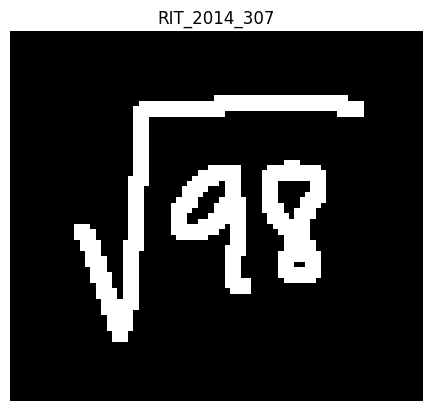

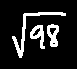

In [ ]:
def display_image(image_dir, image_name):
    image_path = os.path.join(image_dir, image_name + '_0.bmp')
    image = Image.open(image_path)
    #label = image_labels[image_name]

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(image_name)
    plt.axis('off')  # Hide the axis
    plt.show()
    return image

image_dir = 'off_image_test'
display_image(image_dir, "RIT_2014_307")

In [ ]:
from nltk.translate.bleu_score import corpus_bleu

# Assuming you have ground truth expressions and predicted expressions
references = [[['this', 'is', 'a', 'test']]]  # Ground truth, wrapped in two lists
candidates = [['this', 'is', 'a', 'test']]  # Predicted

score = corpus_bleu(references, candidates)
print(f"BLEU score: {score}")

In [ ]:
def check_keys_equality(true_labels_dict, predicted_sequences_dict):
    # Extract sets of keys from both dictionaries
    true_labels_keys = set(true_labels_dict.keys())
    predicted_sequences_keys = set(predicted_sequences_dict.keys())

    # Check if the sets of keys are the same
    if true_labels_keys == predicted_sequences_keys:
        print("The sets of keys in both dictionaries are the same.")
        return True
    else:
        # If they're not the same, find differences
        missing_in_predicted = true_labels_keys - predicted_sequences_keys
        missing_in_true_labels = predicted_sequences_keys - true_labels_keys
        if missing_in_predicted:
            print("Keys missing in predicted_sequences:", missing_in_predicted)
        if missing_in_true_labels:
            print("Keys missing in true_labels:", missing_in_true_labels)
        return False


# Call the function
keys_are_equal = check_keys_equality(test_captions, predicted_labels)


The sets of keys in both dictionaries are the same.


In [ ]:
def tokenize_latex(latex_str):
    """
    Tokenizes a LaTeX string into a list of tokens.
    """
    # Basic tokenization process; can be improved for more complex LaTeX structures
    tokens = latex_str.replace('\\', ' \\').split()
    return tokens

def evaluate_predictions(true_labels_dict, predicted_sequences_dict):
    """
    Evaluates the predicted LaTeX sequences against the true labels.
    """
    partially_correct_count = 0
    all_correct_count = 0
    total_count = 0

    # Iterate over the true labels
    for img_id, true_label in true_labels_dict.items():
        if img_id in predicted_sequences_dict:
            predicted_sequence = tokenize_latex(predicted_sequences_dict[img_id])
            true_sequence = tokenize_latex(true_label)

            # Calculate the intersection and the minimum necessary for partial correctness
            matching_tokens = set(predicted_sequence) & set(true_sequence)
            total_tokens = len(set(true_sequence))
            partial_threshold = max(1, round(total_tokens * 0.5))  # Ensure there's at least 1 token for partial match

            if len(matching_tokens) >= partial_threshold:
                partially_correct_count += 1
                if len(matching_tokens) == total_tokens and len(predicted_sequence) == len(true_sequence):
                    all_correct_count += 1

            total_count += 1

    # Calculate percentages
    partially_correct_pct = (partially_correct_count / total_count) * 100 if total_count > 0 else 0
    all_correct_pct = (all_correct_count / total_count) * 100 if total_count > 0 else 0

    return partially_correct_pct, all_correct_pct

# Example usage
true_labels = {
    # Your true labels here
}

predicted_sequences = {
    # Your predicted sequences here
}

partially_correct_pct, all_correct_pct = evaluate_predictions(test_captions, predicted_labels)
print(f"Partially Correct: {partially_correct_pct:.2f}%")
print(f"All Correct: {all_correct_pct:.2f}%")


Partially Correct: 49.40%
All Correct: 0.00%
